# Aufgabe 2: Classification

A short test to examine the performance gain when using multiple cores on sklearn's esemble classifier random forest.
Depending on the available system the maximum number of jobs to test and the sample size can be adjusted by changing the respective parameters.

In [1]:
# imports
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from timeit import default_timer as timer
import matplotlib.pyplot as plt

First we create a training set of size n_samples containing n_features each.

In [2]:
n_samples = 200000
n_features = 20
X, y = make_classification(n_samples=n_samples, n_features=n_features)

Next we run a performance test on the created data set. Therefor we train a random forest classifier with n_est estimators multiple times and save the best time for later comparison. Each time we use a different number of jobs to train the classifier

In [3]:
# parameter for performance test
n_est = 16
max_jobs = 4
best_in = 3

In [4]:
# performance test
measurements = []
i = 1
while i <= max_jobs:
    min_t = float("inf")  
    for j in range(best_in):
        rnd_forest_clf = RandomForestClassifier(n_estimators=n_est, n_jobs=i)
        start = timer()
        rnd_forest_clf.fit(X,y)
        stop = timer()
        min_t = min(min_t, stop - start)
    measurements.append(min_t)
    i += 1

Finally we plot our results.

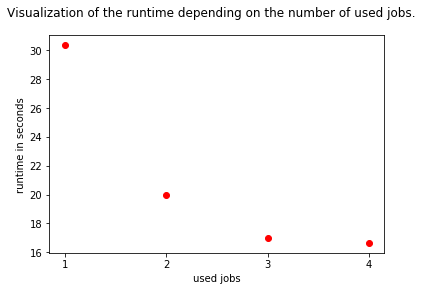

In [5]:
fig = plt.figure()
fig.suptitle('Visualization of the runtime depending on the number of used jobs.')
ax = fig.add_subplot(111)
ax.set_xlabel('used jobs')
ax.set_ylabel('runtime in seconds')
plt.xticks(range(1, max_jobs + 1), range(1, max_jobs + 1))
ax.plot(range(1, max_jobs + 1), measurements, 'ro')
plt.show()